In [1]:
%run utils.ipynb

In [2]:
%matplotlib inline
#%matplotlib notebook

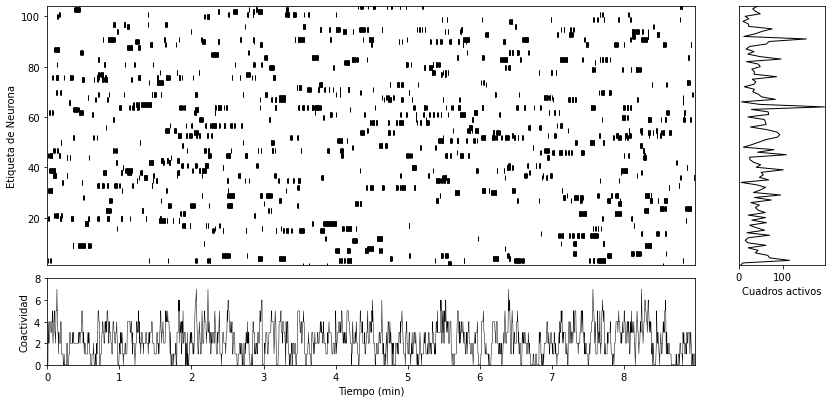

In [3]:
fps=4
raster = np.load("../data/DEC230513A_raster.npy").T
raster=np.delete(raster, np.where(np.sum(raster,axis=1)==0)[0],axis=0).copy()
plot_raster(raster,fps)
#plt.savefig('../figures/raster.svg', format='svg', dpi=300, transparent=True)

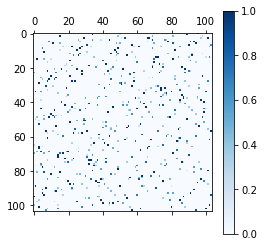

In [4]:
mapper = umap.UMAP(n_neighbors=5,min_dist=0.1,n_components=3,random_state=42,metric='correlation',).fit(raster)
ma=get_adj_matrix(mapper)
plt.matshow(ma,cmap='Blues')
plt.colorbar()
#plt.savefig('../figures/adj_matrix.svg', format='svg', dpi=300, transparent=True)
plt.show()

In [5]:
cluster_index,mat_mismo_grupo=get_clusters_modularidad(ma,n_iter=1000)
cluster_index=nuevo_cluster_index(cluster_index,[7,5,2,8,4,0,1,3,6])

Number of Ensembles:  9


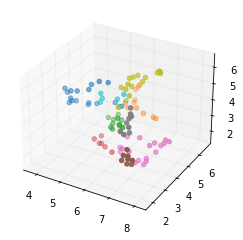

In [6]:
fig = plt.figure()
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mapper.embedding_[:, 0],mapper.embedding_[:, 1],mapper.embedding_[:, 2],c=cluster_index, cmap='tab10')
#plt.savefig('../figures/proj_neurons.svg', format='svg', dpi=300, transparent=True)
plt.show()

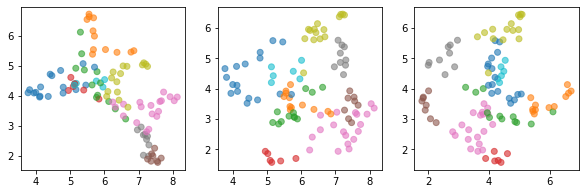

In [7]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(131)
ax.scatter(
    mapper.embedding_[:, 0],
    mapper.embedding_[:, 1],
    alpha=0.6,
    c=cluster_index, cmap='tab10')

ax = fig.add_subplot(132)
ax.scatter(
    mapper.embedding_[:, 0],
    mapper.embedding_[:, 2],
    alpha=0.6,
    c=cluster_index, cmap='tab10')

ax = fig.add_subplot(133)
ax.scatter(
    mapper.embedding_[:, 1],
    mapper.embedding_[:, 2],
    alpha=0.6,
    c=cluster_index, cmap='tab10')
#plt.savefig('../figures/planes_proj_neurons.svg', format='svg', dpi=300, transparent=True)
plt.show()

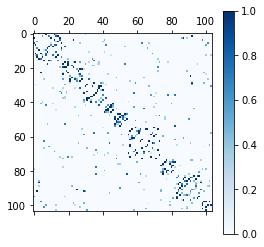

In [8]:
ma_ordered=get_ordered_adj_matrix(ma,cluster_index)
plt.matshow(ma_ordered,cmap='Blues')
plt.colorbar()
#plt.savefig('../figures/ordered_adj_matrix.svg', format='svg', dpi=300, transparent=True)
plt.show()

In [9]:
G=get_gephi_graph(ma,cluster_index,0.05)
#nx.write_gml(G, "../graphs/DEC230513A.gml")

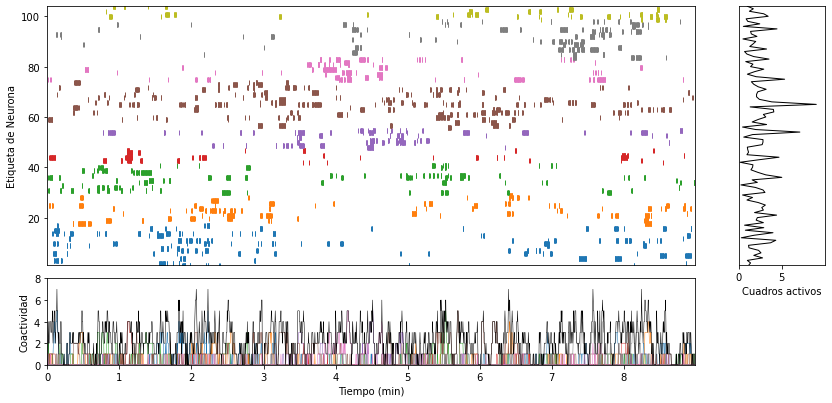

In [10]:
ord_plot_ch=plot_cluster_raster_h(raster,fps,cluster_index,name_colormap='tab10')
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)